In [19]:
pip install -r requirements.txt

     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.6 kB 1.3 MB/s eta 0:00:01
     -------------------- ------------------- 30.7/60.6 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 402.7 kB/s eta 0:00:00
     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     ---------------------------- --------- 122.9/165.5 kB 2.4 MB/s eta 0:00:01
     -------------------------------------- 165.5/165.5 kB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
    --------------------------------------- 0.2/10.9 MB 3.9 MB/s eta 0:00:03
   - -------------------------------------- 0.4/10.9 MB 5.2 MB/s eta 0:00:03
   -- ------------------------------------- 0.7/10.9 MB 5.4 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/10.9 MB 5.5 MB/s eta 0:00:02
   ---- ----------------------------------- 1.3/10.9 MB 5.7 MB/s eta 0:00:02


In [20]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from itertools import cycle
import plotly.graph_objects as go # add details
import plotly.express as px
from plotly.subplots import make_subplots

import seaborn as sns 
import matplotlib.pyplot as plt 
from colorama import Fore #for adding colours

In [22]:
bitcoindf = pd.read_csv(r"./BTC-USD.csv")
bitcoindf = bitcoindf.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})
bitcoindf.head()

,date,open,high,low,close,adj_close,volume
0,2015-09-13,235.242004,235.934998,229.332001,230.511993,230.511993,18478800.0
1,2015-09-14,230.608994,232.440002,227.960999,230.643997,230.643997,20997800.0
2,2015-09-15,230.492004,259.182007,229.822006,230.304001,230.304001,19177800.0
3,2015-09-16,230.250000,231.214996,227.401993,229.091003,229.091003,20144200.0
4,2015-09-17,229.076004,230.285004,228.925995,229.809998,229.809998,18935400.0


In [25]:
cardanodf = pd.read_csv(r".\ADA-USD.csv")
cardanodf = cardanodf.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})
cardanodf.head()

,date,open,high,low,close,adj_close,volume
0,2017-10-01,0.021678,0.032226,0.017354,0.024969,0.024969,50068700.0
1,2017-10-02,0.024607,0.030088,0.019969,0.025932,0.025932,57641300.0
2,2017-10-03,0.025757,0.027425,0.020690,0.020816,0.020816,16997800.0
3,2017-10-04,0.020864,0.022806,0.020864,0.021931,0.021931,9000050.0
4,2017-10-05,0.021951,0.022154,0.020859,0.021489,0.021489,5562510.0


In [26]:
ethereumdf = pd.read_csv(r".\ETH-USD.csv")
ethereumdf = ethereumdf.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})
ethereumdf.head()

,date,open,high,low,close,adj_close,volume
0,2015-09-13,1.041780,1.042700,0.902832,0.936003,0.936003,644138.0
1,2015-09-14,0.940566,0.949387,0.871760,0.875622,0.875622,741085.0
2,2015-09-15,0.875189,1.045540,0.875189,0.944410,0.944410,703390.0
3,2015-09-16,0.941977,0.952698,0.901639,0.907175,0.907175,615593.0
4,2015-09-17,0.906865,0.909204,0.831132,0.874231,0.874231,897940.0


In [27]:
#Convert Date column into Datatime format
bitcoindf['date'] = pd.to_datetime(bitcoindf.date)
ethereumdf['date'] = pd.to_datetime(ethereumdf.date)
cardanodf['date'] = pd.to_datetime(cardanodf.date)

Text(0.5, 1.0, 'Ethereum Close Price')

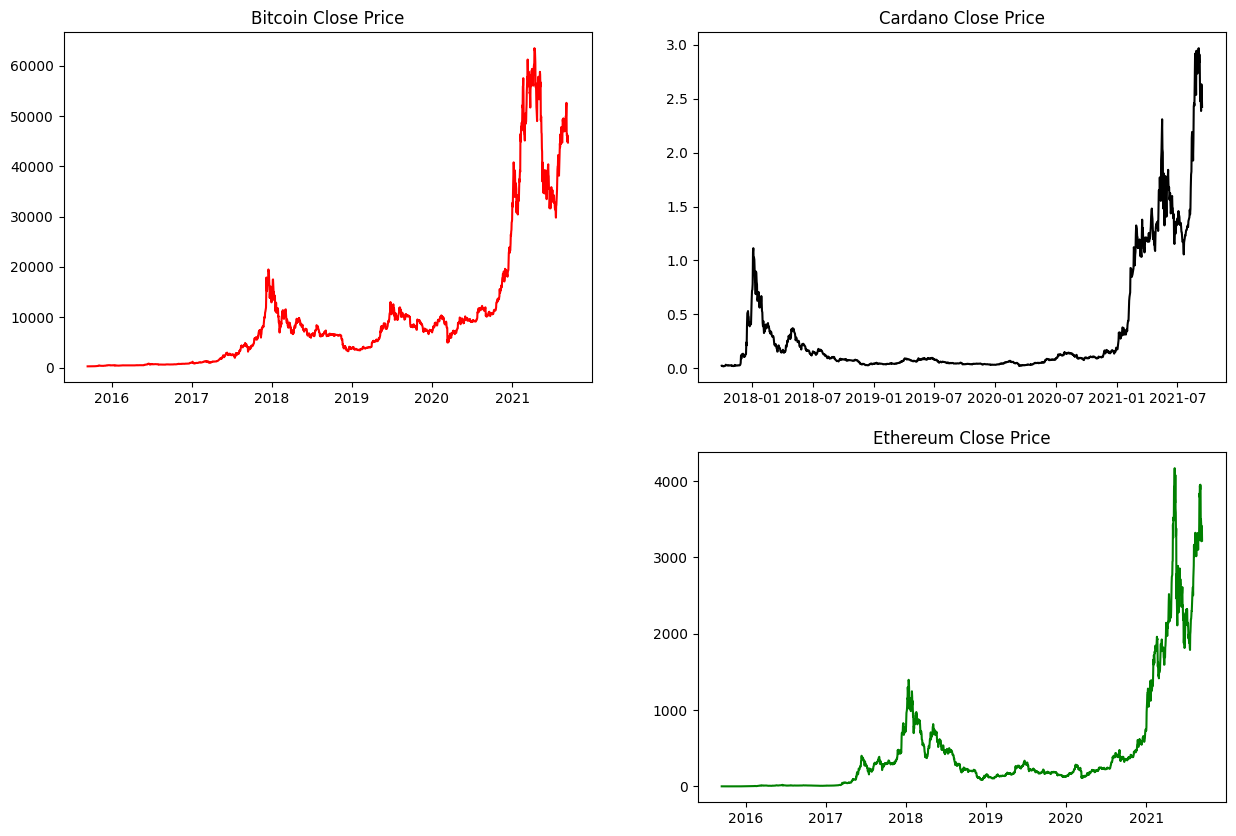

In [28]:
#Visualize close price of Bitcoin, Cardano, Ethereum
fig = plt.figure(figsize = (15,10))

plt.subplot(2, 2, 1)
plt.plot(bitcoindf['date'], bitcoindf['close'], color="red")
plt.title('Bitcoin Close Price')

plt.subplot(2, 2, 2)
plt.plot(cardanodf['date'], cardanodf['close'], color="black")
plt.title('Cardano Close Price')

plt.subplot(2, 2, 4)
plt.plot(ethereumdf['date'], ethereumdf['close'], color="green")
plt.title('Ethereum Close Price')

In [29]:
#Plotting only 2020-2021 year close price of Bitcoin, Cardano, Dogecoin and Ethereum
last1year_bitcoindf = bitcoindf[bitcoindf['date'] > '09-2020']
last1year_cardanodf = cardanodf[cardanodf['date'] > '09-2020']
last1year_ethereumdf = ethereumdf[ethereumdf['date'] > '09-2020']

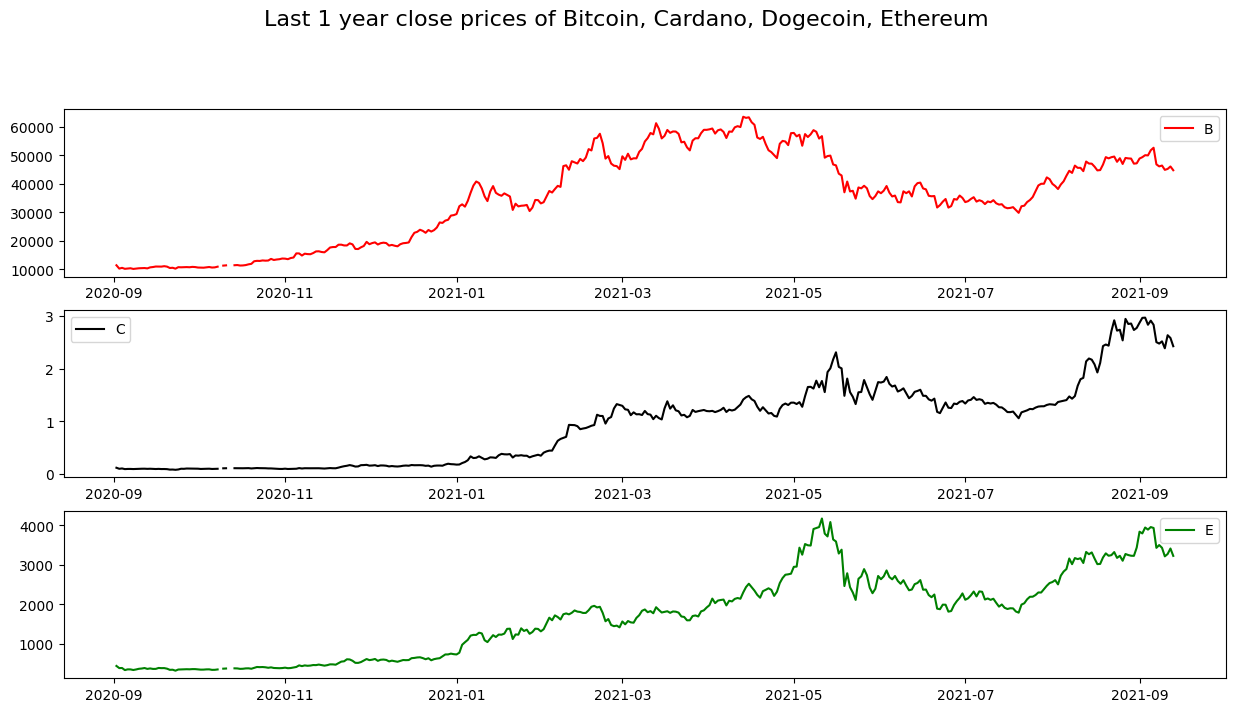

In [31]:
fig = plt.figure(figsize = (15,10))
fig.suptitle("Last 1 year close prices of Bitcoin, Cardano, Ethereum", fontsize=16)


plt.subplot(4, 1, 1)
plt.plot(last1year_bitcoindf['date'], last1year_bitcoindf['close'], color="red")
plt.legend("B")

plt.subplot(4, 1, 2)
plt.plot(last1year_cardanodf['date'], last1year_cardanodf['close'], color="black")
plt.legend("C")

plt.subplot(4, 1, 3)
plt.plot(last1year_ethereumdf['date'], last1year_ethereumdf['close'], color="green")
plt.legend("E")